# Import Libraries

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Data

In [75]:
Meningioma_dir = os.path.join('dataset2/1')
Glioma_dir = os.path.join('dataset2/2')
Pituitary_dir = os.path.join('dataset2/3')

In [78]:
Meningioma_files = os.listdir(Meningioma_dir)
Glioma_files = os.listdir(Glioma_dir)
Pituitary_files = os.listdir(Pituitary_dir)

In [79]:
print('Total Meningioma images : ', len(Meningioma_files))
print('Total Glioma images : ', len(Glioma_files))
print('Total Pituitary images : ', len(Pituitary_files))

Total Meningioma images :  709
Total Glioma images :  1426
Total Pituitary images :  930


In [81]:
# Parameters for our graph
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

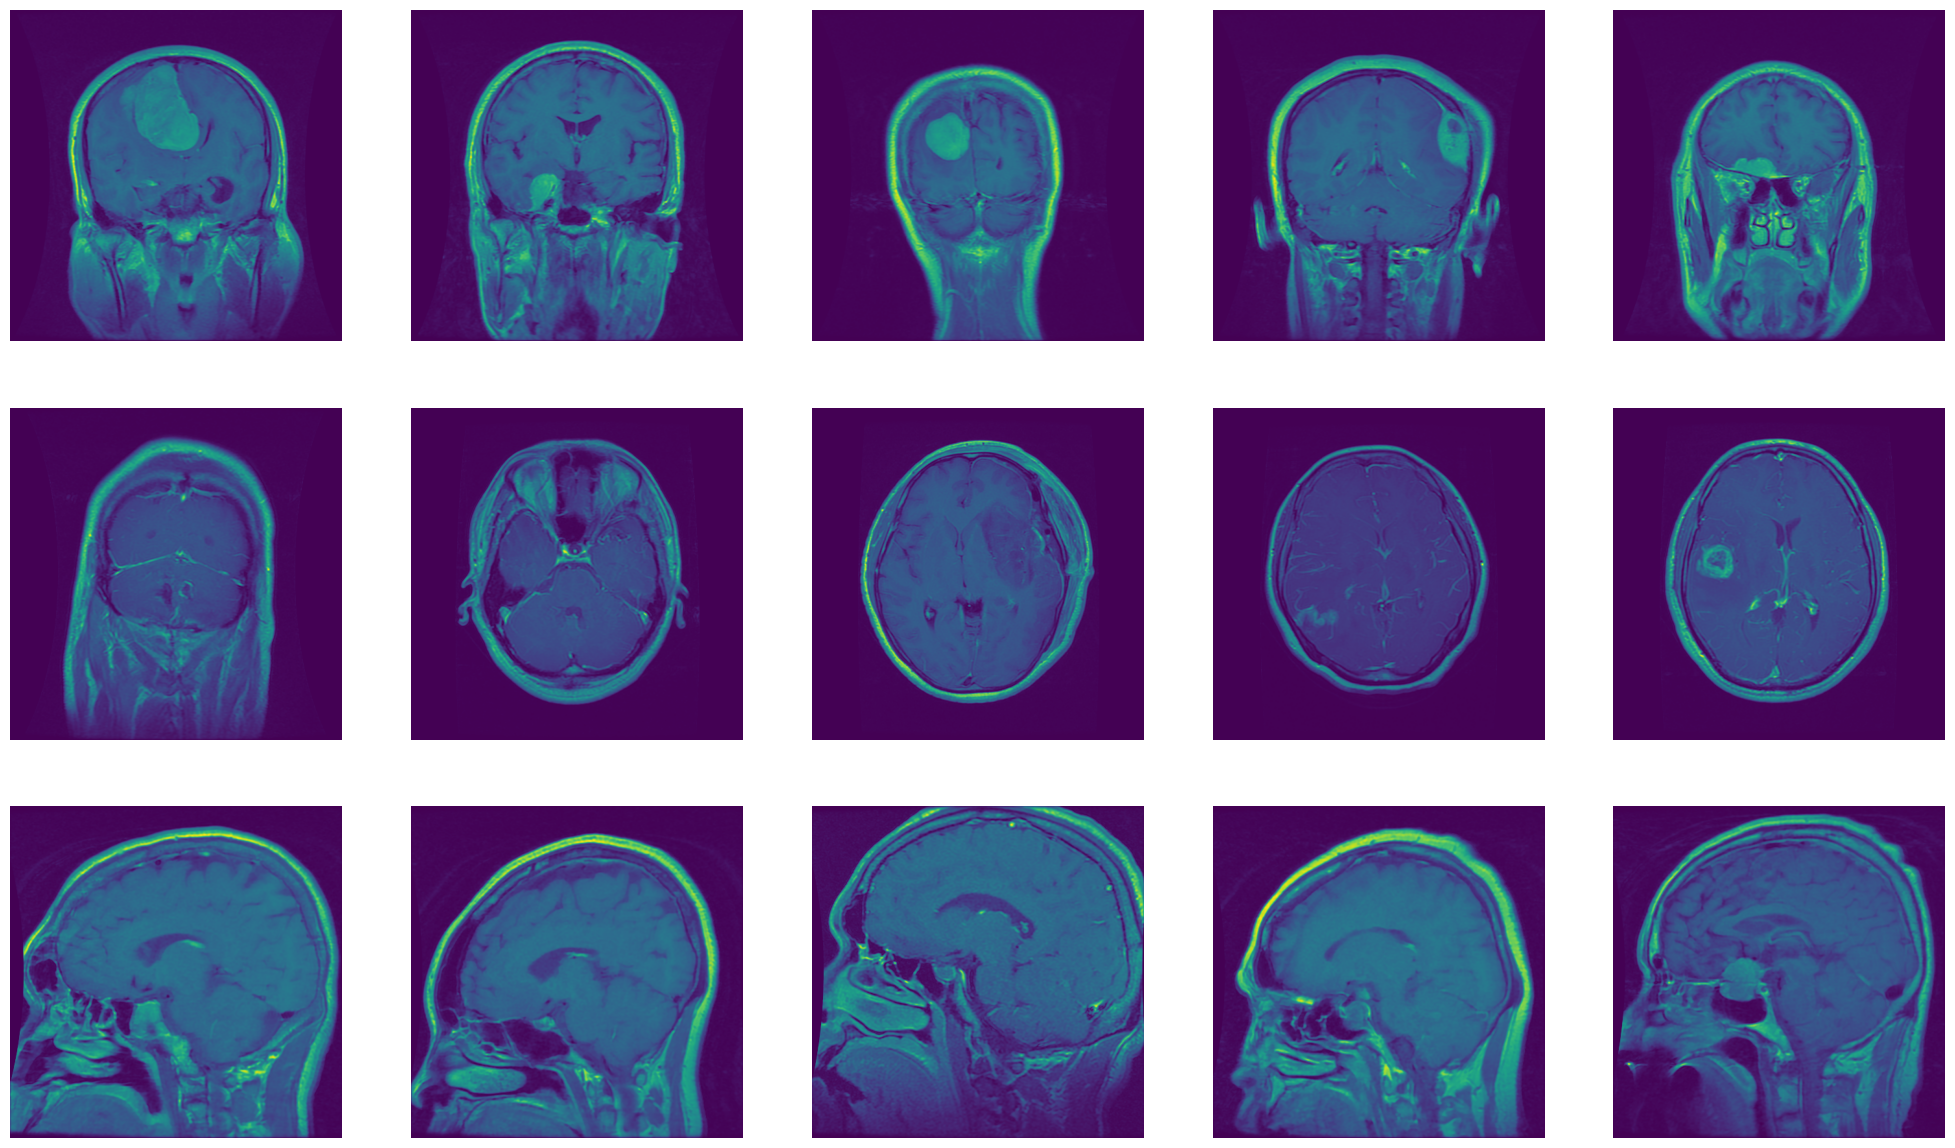

In [88]:
# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 5
next_Meningioma_pix = [os.path.join(Meningioma_dir, fname)
                for fname in Meningioma_files[pic_index-5:pic_index]]
next_Glioma_pix = [os.path.join(Glioma_dir, fname)
                for fname in Glioma_files[pic_index-5:pic_index]]
next_Pituitary_pix = [os.path.join(Pituitary_dir, fname)
                for fname in Pituitary_files[pic_index-5:pic_index]]

for i, img_path in enumerate(next_Meningioma_pix+next_Glioma_pix+next_Pituitary_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Augmentation

In [2]:
dataset_dir = 'dataset2'

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation'
)

Found 2452 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


# Modelling

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [13]:
model.compile(optimizer='adam', metrics=['acc'], loss='binary_crossentropy')

history= model.fit(train_generator, epochs=20, validation_data=val_generator, shuffle=True)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - acc: 0.5978 - loss: 0.6628 - val_acc: 0.7941 - val_loss: 0.3256
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - acc: 0.8298 - loss: 0.2647 - val_acc: 0.8007 - val_loss: 0.2980
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.8776 - loss: 0.1868 - val_acc: 0.7222 - val_loss: 0.5015
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - acc: 0.9328 - loss: 0.1261 - val_acc: 0.7239 - val_loss: 0.5087
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - acc: 0.9506 - loss: 0.0871 - val_acc: 0.7500 - val_loss: 0.5323
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - acc: 0.9760 - loss: 0.0554 - val_acc: 0.7859 - val_loss: 0.4994
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - acc: 0.9867 - loss: 0.0301 - val_acc: 0.8382 - val_loss: 0.4517
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - acc: 0.9850 - loss: 0.0294 - val_acc: 0.8235 - val_loss: 0.5649
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - acc: 0.9914

# Model Evaluation

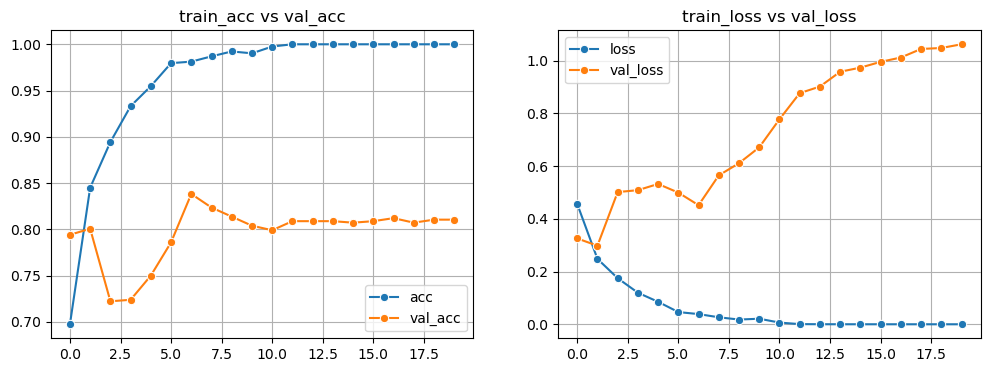

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=history.history['acc'], ax=axes[0], label='acc', marker='o')
sns.lineplot(data=history.history['val_acc'], ax=axes[0], label='val_acc', marker='o')

sns.lineplot(data=history.history['loss'], ax=axes[1], label='loss', marker='o')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss', marker='o')

axes[0].set_title('train_acc vs val_acc')
axes[1].set_title('train_loss vs val_loss')

axes[0].grid(True)
axes[1].grid(True)

plt.legend()
plt.show()